In [478]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn import metrics
import pandas_datareader.data as web
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split ,GridSearchCV , RandomizedSearchCV

# DATA PREPARATION

> ## 5.1 (a) Get Data

In [6]:
stk_tickers = ['MSFT', 'IBM', 'GOOGL']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']

In [7]:
stk_data = web.DataReader(stk_tickers, 'yahoo')
ccy_data = web.DataReader(ccy_tickers, 'fred')
idx_data = web.DataReader(idx_tickers, 'fred')

In [8]:
stk_data

Attributes   Adj Close                                Close              \
Symbols           MSFT         IBM        GOOGL        MSFT         IBM   
Date                                                                      
2017-02-24   60.321789  137.278824   847.809998   64.620003  173.374756   
2017-02-27   59.957737  135.802750   849.669983   64.230003  171.510513   
2017-02-28   59.724354  136.120651   844.929993   63.980000  171.912048   
2017-03-01   60.620506  137.733047   856.750000   64.940002  173.948380   
2017-03-02   59.752354  136.658127   849.849976   64.010002  172.590820   
...                ...         ...          ...         ...         ...   
2022-02-16  299.500000  129.179993  2754.760010  299.500000  129.179993   
2022-02-17  290.730011  124.970001  2650.780029  290.730011  124.970001   
2022-02-18  287.929993  124.349998  2608.060059  287.929993  124.349998   
2022-02-22  287.720001  123.919998  2596.270020  287.720001  123.919998   
2022-02-23  280.269989  122.070000  2551.760010  280.269989  122.070000   

Attributes                     High                                  Low  \
Symbols           GOOGL        MSFT         IBM        GOOGL        MSFT   
Date                                                                       
2017-02-24   847.809998   64.800003  173.508606   848.359985   64.139999   
2017-02-27   849.669983   64.540001  173.279160   850.669983   64.050003   
2017-02-28   844.929993   64.199997  172.686417   848.830017   63.759998   
2017-03-01   856.750000   64.989998  174.521988   858.000000   64.019997   
2017-03-02   849.849976   64.750000  173.881454   856.489990   63.880001   
...                 ...         ...         ...          ...         ...   
2022-02-16  2754.760010  300.869995  130.440002  2761.719971  293.679993   
2022-02-17  2650.780029  296.799988  128.500000  2742.270020  290.000000   
2022-02-18  2608.060059  293.859985  125.440002  2681.399902  286.309998   
2022-02-22  2596.270020  291.540009  125.000000  2643.610107  284.500000   
2022-02-23  2551.760010  291.700012  124.699997  2641.020020  280.100006   

Attributes                                 Open                           \
Symbols            IBM        GOOGL        MSFT         IBM        GOOGL   
Date                                                                       
2017-02-24  171.978973   842.960022   64.529999  172.284897   847.650024   
2017-02-27  171.395798   843.010010   64.540001  173.221802   844.950012   
2017-02-28  171.462708   841.440002   64.080002  171.491394   847.349976   
2017-03-01  172.112808   849.020020   64.129997  172.543015   851.380005   
2017-03-02  172.495224   848.719971   64.690002  173.881454   856.309998   
...                ...          ...         ...         ...          ...   
2022-02-16  128.259995  2698.479980  298.369995  129.449997  2732.929932   
2022-02-17  124.849998  2649.570068  296.359985  128.050003  2724.860107   
2022-02-18  123.610001  2603.929932  293.049988  124.940002  2669.340088   
2022-02-22  122.680000  2564.469971  285.000000  124.199997  2596.760010   
2022-02-23  121.870003  2550.550049  290.179993  124.379997  2632.969971   

Attributes      Volume                        
Symbols           MSFT        IBM      GOOGL  
Date                                          
2017-02-24  21796800.0  3451905.0  1346200.0  
2017-02-27  15871500.0  3861100.0  1010300.0  
2017-02-28  23239800.0  3423976.0  1383100.0  
2017-03-01  26937500.0  3143858.0  1818700.0  
2017-03-02  24539600.0  3052437.0  1250900.0  
...                ...        ...        ...  
2022-02-16  29982100.0  4875600.0  1251100.0  
2022-02-17  32461600.0  6797000.0  1947500.0  
2022-02-18  34223200.0  4607600.0  2277400.0  
2022-02-22  41736100.0  5349700.0  2249500.0  
2022-02-23  37670600.0  4084500.0  1632800.0  

[1259 rows x 18 columns]

In [9]:
stk_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-02-24 to 2022-02-23
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, MSFT)   1259 non-null   float64
 1   (Adj Close, IBM)    1259 non-null   float64
 2   (Adj Close, GOOGL)  1259 non-null   float64
 3   (Close, MSFT)       1259 non-null   float64
 4   (Close, IBM)        1259 non-null   float64
 5   (Close, GOOGL)      1259 non-null   float64
 6   (High, MSFT)        1259 non-null   float64
 7   (High, IBM)         1259 non-null   float64
 8   (High, GOOGL)       1259 non-null   float64
 9   (Low, MSFT)         1259 non-null   float64
 10  (Low, IBM)          1259 non-null   float64
 11  (Low, GOOGL)        1259 non-null   float64
 12  (Open, MSFT)        1259 non-null   float64
 13  (Open, IBM)         1259 non-null   float64
 14  (Open, GOOGL)       1259 non-null   float64
 15  (Volume, MSFT)      1259 non-null   f

In [10]:
ccy_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1300 entries, 2017-02-27 to 2022-02-18
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DEXJPUS  1244 non-null   float64
 1   DEXUSUK  1244 non-null   float64
dtypes: float64(2)
memory usage: 30.5 KB


In [11]:
idx_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1303 entries, 2017-02-27 to 2022-02-23
Freq: B
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   1258 non-null   float64
 1   DJIA    1258 non-null   float64
 2   VIXCLS  1257 non-null   float64
dtypes: float64(3)
memory usage: 40.7 KB


In [12]:
stk_data.head()

Attributes  Adj Close                              Close              \
Symbols          MSFT         IBM       GOOGL       MSFT         IBM   
Date                                                                   
2017-02-24  60.321789  137.278824  847.809998  64.620003  173.374756   
2017-02-27  59.957737  135.802750  849.669983  64.230003  171.510513   
2017-02-28  59.724354  136.120651  844.929993  63.980000  171.912048   
2017-03-01  60.620506  137.733047  856.750000  64.940002  173.948380   
2017-03-02  59.752354  136.658127  849.849976  64.010002  172.590820   

Attributes                   High                                Low  \
Symbols          GOOGL       MSFT         IBM       GOOGL       MSFT   
Date                                                                   
2017-02-24  847.809998  64.800003  173.508606  848.359985  64.139999   
2017-02-27  849.669983  64.540001  173.279160  850.669983  64.050003   
2017-02-28  844.929993  64.199997  172.686417  848.830017  63.759998   
2017-03-01  856.750000  64.989998  174.521988  858.000000  64.019997   
2017-03-02  849.849976  64.750000  173.881454  856.489990  63.880001   

Attributes                               Open                          \
Symbols            IBM       GOOGL       MSFT         IBM       GOOGL   
Date                                                                    
2017-02-24  171.978973  842.960022  64.529999  172.284897  847.650024   
2017-02-27  171.395798  843.010010  64.540001  173.221802  844.950012   
2017-02-28  171.462708  841.440002  64.080002  171.491394  847.349976   
2017-03-01  172.112808  849.020020  64.129997  172.543015  851.380005   
2017-03-02  172.495224  848.719971  64.690002  173.881454  856.309998   

Attributes      Volume                        
Symbols           MSFT        IBM      GOOGL  
Date                                          
2017-02-24  21796800.0  3451905.0  1346200.0  
2017-02-27  15871500.0  3861100.0  1010300.0  
2017-02-28  23239800.0  3423976.0  1383100.0  
2017-03-01  26937500.0  3143858.0  1818700.0  
2017-03-02  24539600.0  3052437.0  1250900.0

In [13]:
Base = stk_data.loc[:, ('Adj Close', 'MSFT')]
X1 = stk_data.loc[:, ('Adj Close', ('GOOGL', 'IBM'))]
X2 = ccy_data
X3 = idx_data

In [14]:
Base

Date
2017-02-24     60.321789
2017-02-27     59.957737
2017-02-28     59.724354
2017-03-01     60.620506
2017-03-02     59.752354
                 ...    
2022-02-16    299.500000
2022-02-17    290.730011
2022-02-18    287.929993
2022-02-22    287.720001
2022-02-23    280.269989
Name: (Adj Close, MSFT), Length: 1259, dtype: float64

> ## z-norm x1 , x2 , x3

In [15]:
std = StandardScaler()

In [16]:
X1 = pd.DataFrame(std.fit_transform(X1.values), index = X1.index,columns=X1.columns)

In [17]:
X2[X2.columns] = std.fit_transform(X2)

In [19]:
X3[X3.columns] = std.fit_transform(X3)

> sum of base different

In [20]:
return_period = 3

In [21]:
Y = Base.shift(-return_period)
X4_3DT = Base.diff(3 *return_period).shift(-3 * return_period)
X4_6DT = Base.diff(6 *return_period).shift(-6 * return_period)
X4_12DT = Base.diff(12 *return_period).shift(-12 * return_period)

In [22]:
X4_3DT

Date
2017-02-24    0.102680
2017-02-27    0.653431
2017-02-28    0.681446
2017-03-01   -0.494743
2017-03-02    0.690788
                ...   
2022-02-16         NaN
2022-02-17         NaN
2022-02-18         NaN
2022-02-22         NaN
2022-02-23         NaN
Name: (Adj Close, MSFT), Length: 1259, dtype: float64

In [23]:
X4 = pd.concat([X4_3DT,X4_6DT,X4_12DT] ,axis=1)

In [24]:
X4.columns = ['MSFT_3DT', 'MSFT_6DT', 'MSFT_12DT']

In [25]:
X4 = pd.DataFrame(std.fit_transform(X4.values), index = X4.index,columns=X4.columns)

In [26]:
X4

,MSFT_3DT,MSFT_6DT,MSFT_12DT
Date,,,
2017-02-24,-0.207484,-0.292432,-0.481386
2017-02-27,-0.134869,-0.272123,-0.478596
2017-02-28,-0.131175,-0.240335,-0.429064
2017-03-01,-0.286252,-0.314506,-0.433249
2017-03-02,-0.129944,-0.215612,-0.289539
...,...,...,...
2022-02-16,NaN,NaN,NaN
2022-02-17,NaN,NaN,NaN
2022-02-18,NaN,NaN,NaN


In [350]:
X4.tail(10)

,MSFT_3DT,MSFT_6DT,MSFT_12DT
Date,,,
2022-02-09,-4.215678,NaN,NaN
2022-02-10,NaN,NaN,NaN
2022-02-11,NaN,NaN,NaN
2022-02-14,NaN,NaN,NaN
2022-02-15,NaN,NaN,NaN
2022-02-16,NaN,NaN,NaN
2022-02-17,NaN,NaN,NaN
2022-02-18,NaN,NaN,NaN
2022-02-22,NaN,NaN,NaN


In [28]:
X4_null = X4[X4.isnull().any(axis=1)]
X4_null

,MSFT_3DT,MSFT_6DT,MSFT_12DT
Date,,,
2022-01-03,-3.451168,-2.829110,NaN
2022-01-04,-3.689323,-2.030543,NaN
2022-01-05,-1.938070,-1.047909,NaN
2022-01-06,-1.836755,-0.368280,NaN
2022-01-07,-2.590674,-1.535923,NaN
2022-01-10,-2.576201,-1.114928,NaN
2022-01-11,-3.706427,-1.652972,NaN
2022-01-12,-3.057761,-1.622763,NaN
2022-01-13,-0.873630,0.276427,NaN


In [29]:
X4.describe()

,MSFT_3DT,MSFT_6DT,MSFT_12DT
count,1.250000e+03,1.241000e+03,1.223000e+03
mean,5.115908e-17,-1.932379e-17,1.822836e-16
std,1.000400e+00,1.000403e+00,1.000409e+00
min,-4.368246e+00,-5.374898e+00,-4.672049e+00
25%,-3.460295e-01,-3.727960e-01,-4.299314e-01
50%,5.708003e-03,-4.011561e-02,-7.883766e-02
75%,4.393673e-01,3.892316e-01,4.037902e-01
max,3.447133e+00,3.739826e+00,4.066793e+00


> ## forming dataset

In [30]:
X = pd.concat([X1, X2, X3, X4], axis=1)

In [31]:
dataset = pd.concat([Y, X], axis=1)

In [32]:
dataset

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-02-24,60.620506,-1.067394,2.087293,NaN,NaN,NaN,NaN,NaN,-0.207484,-0.292432,-0.481386
2017-02-27,59.752354,-1.064342,1.937819,0.839018,-1.296609,-1.185554,-1.464163,-0.762129,-0.134869,-0.272123,-0.478596
2017-02-28,59.976398,-1.072120,1.970011,0.856758,-1.384129,-1.194438,-1.469902,-0.667495,-0.131175,-0.240335,-0.429064
2017-03-01,59.995068,-1.052724,2.133290,1.424427,-1.591515,-1.147445,-1.400836,-0.710822,-0.286252,-0.314506,-0.433249
2017-03-02,60.116417,-1.064047,2.024438,1.704714,-1.688548,-1.167859,-1.426471,-0.794054,-0.129944,-0.215612,-0.289539
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-17,280.269989,1.891286,0.840841,1.910494,0.893301,1.737756,1.604099,1.064422,NaN,NaN,NaN
2022-02-18,NaN,1.821182,0.778057,1.928234,0.819099,1.692114,1.551078,1.023376,NaN,NaN,NaN
2022-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-22,NaN,1.801835,0.734513,NaN,NaN,1.627978,1.441193,1.144234,NaN,NaN,NaN


In [33]:
dataset.head()

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-02-24,60.620506,-1.067394,2.087293,NaN,NaN,NaN,NaN,NaN,-0.207484,-0.292432,-0.481386
2017-02-27,59.752354,-1.064342,1.937819,0.839018,-1.296609,-1.185554,-1.464163,-0.762129,-0.134869,-0.272123,-0.478596
2017-02-28,59.976398,-1.072120,1.970011,0.856758,-1.384129,-1.194438,-1.469902,-0.667495,-0.131175,-0.240335,-0.429064
2017-03-01,59.995068,-1.052724,2.133290,1.424427,-1.591515,-1.147445,-1.400836,-0.710822,-0.286252,-0.314506,-0.433249
2017-03-02,60.116417,-1.064047,2.024438,1.704714,-1.688548,-1.167859,-1.426471,-0.794054,-0.129944,-0.215612,-0.289539


# 5.1 (c) Data Preparation

In [34]:
null_data = dataset[dataset.isnull().any(axis=1)]
null_data

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-02-24,60.620506,-1.067394,2.087293,NaN,NaN,NaN,NaN,NaN,-0.207484,-0.292432,-0.481386
2017-04-14,NaN,NaN,NaN,-0.360184,-1.186258,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-17,280.269989,1.891286,0.840841,1.910494,0.893301,1.737756,1.604099,1.064422,NaN,NaN,NaN
2022-02-18,NaN,1.821182,0.778057,1.928234,0.819099,1.692114,1.551078,1.023376,NaN,NaN,NaN
2022-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-22,NaN,1.801835,0.734513,NaN,NaN,1.627978,1.441193,1.144234,NaN,NaN,NaN


In [35]:
dataset.dropna(how="any",inplace=True)

In [351]:
dataset.head(10)

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-02-27,59.752354,-1.064342,1.937819,0.839018,-1.296609,-1.185554,-1.464163,-0.762129,-0.134869,-0.272123,-0.478596
2017-02-28,59.976398,-1.072120,1.970011,0.856758,-1.384129,-1.194438,-1.469902,-0.667495,-0.131175,-0.240335,-0.429064
2017-03-01,59.995068,-1.052724,2.133290,1.424427,-1.591515,-1.147445,-1.400836,-0.710822,-0.286252,-0.314506,-0.433249
2017-03-02,60.116417,-1.064047,2.024438,1.704714,-1.688548,-1.167859,-1.426471,-0.794054,-0.129944,-0.215612,-0.289539
2017-03-03,60.667187,-1.065310,1.987638,1.757933,-1.722795,-1.166114,-1.425847,-0.890968,-0.173022,-0.220911,-0.279074
2017-03-06,60.424469,-1.068280,2.019837,1.516673,-1.734211,-1.177470,-1.437544,-0.859044,-0.147176,-0.201485,-0.286749
2017-03-07,60.611168,-1.061913,2.012938,1.541509,-1.798900,-1.187532,-1.444280,-0.835100,-0.155790,-0.199717,-0.265122
2017-03-08,60.405800,-1.057827,1.941646,1.750837,-1.907349,-1.195398,-1.459999,-0.788353,-0.317023,-0.279187,-0.293027
2017-03-09,60.125763,-1.050935,1.767639,1.796960,-1.880712,-1.192650,-1.459438,-0.738186,-0.184100,-0.240336,-0.208614
2017-03-10,60.443142,-1.045077,1.817466,1.906946,-1.895933,-1.181410,-1.449239,-0.811157,-0.228406,-0.273006,-0.230239


In [37]:
null_data = dataset[dataset.isnull().any(axis=1)]
null_data

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT


> Assign X ,Y 

In [38]:
dataset_nodate = dataset.reset_index(drop = "true")

In [39]:
Y = dataset_nodate.iloc[:,:1]
X = dataset_nodate.iloc[:,1:]

In [367]:
X.describe()

,"(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,-0.042735,-0.053047,-0.021911,-0.056988,-0.016939,0.030943,0.015362,0.002820
std,0.973079,0.961291,1.004569,0.963987,1.010229,0.953896,0.988381,0.994848
min,-3.527341,-2.527972,-3.163075,-1.975482,-1.098479,-3.987170,-5.374898,-4.519471
25%,-0.586058,-0.711429,-0.683967,-0.662003,-0.688018,-0.327114,-0.354653,-0.429859
50%,-0.088359,-0.019582,-0.122696,-0.274033,-0.271856,0.010550,-0.034068,-0.078983
75%,0.471939,0.636786,0.723968,0.392173,0.319891,0.439206,0.398705,0.401979
max,2.304002,2.020480,2.240352,2.099727,7.287466,3.447133,3.739826,4.066793


In [41]:
Y.head()

,"(Adj Close, MSFT)"
0,59.752354
1,59.976398
2,59.995068
3,60.116417
4,60.667187


> # Reduce Correlation Features

<AxesSubplot:>

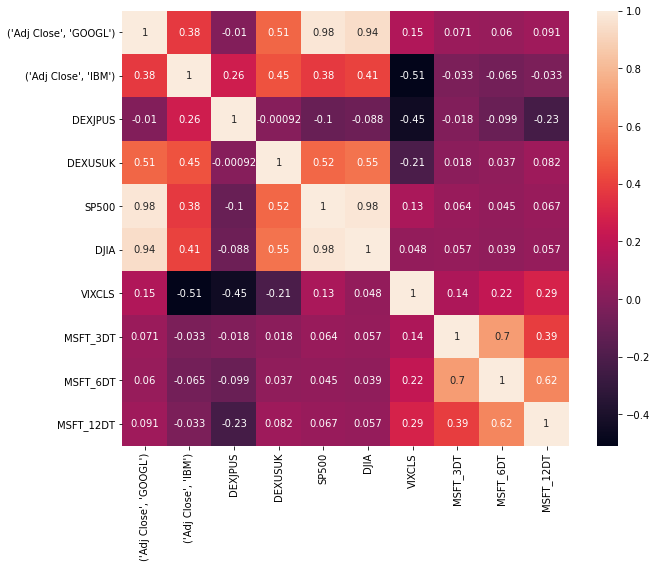

In [42]:
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(),annot=True )

In [43]:
#sns.pairplot(X, hue="SP500")

In [44]:
lower_cor = pd.DataFrame(np.tril(X.corr(), -1), columns = X.columns)
lower_cor

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
1,0.379958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
2,-0.010260,0.260428,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
3,0.513191,0.452452,-0.000922,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
4,0.982224,0.378337,-0.102596,0.517837,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
5,0.944915,0.409802,-0.087761,0.553395,0.980908,0.000000,0.000000,0.000000,0.00000,0.0
6,0.146945,-0.508062,-0.447210,-0.213025,0.127483,0.048372,0.000000,0.000000,0.00000,0.0
7,0.070977,-0.033154,-0.017865,0.017566,0.063828,0.057342,0.136127,0.000000,0.00000,0.0
8,0.059529,-0.065363,-0.098558,0.036959,0.045373,0.038547,0.215383,0.695611,0.00000,0.0
9,0.091372,-0.032852,-0.232073,0.081953,0.067344,0.056968,0.290987,0.388535,0.61952,0.0


> #### Drop features  correlation > |0.9|

In [45]:
to_drop = [column for column in lower_cor if any(lower_cor[column] > abs(0.9) )]
to_drop

[('Adj Close', 'GOOGL'), 'SP500']

In [46]:
X = X.drop(to_drop, axis=1)
X

,"(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,1.937819,0.839018,-1.296609,-1.464163,-0.762129,-0.134869,-0.272123,-0.478596
1,1.970011,0.856758,-1.384129,-1.469902,-0.667495,-0.131175,-0.240335,-0.429064
2,2.133290,1.424427,-1.591515,-1.400836,-0.710822,-0.286252,-0.314506,-0.433249
3,2.024438,1.704714,-1.688548,-1.426471,-0.794054,-0.129944,-0.215612,-0.289539
4,1.987638,1.757933,-1.722795,-1.425847,-0.890968,-0.173022,-0.220911,-0.279074
...,...,...,...,...,...,...,...,...
1200,1.256557,1.694070,0.486141,1.977205,-0.092850,-2.959082,-3.452107,-3.087202
1201,1.355615,1.846631,0.539414,2.057317,-0.124775,-3.959047,-4.710369,-3.692094
1202,1.456676,1.811152,0.527999,2.079138,-0.140737,-3.770894,-4.565002,-4.258009
1203,1.528718,1.889207,0.609811,2.099727,-0.208007,-3.769578,-5.374898,-4.519471


# Train / Test Preparation

In [47]:
test_size = int(0.3 * len(X))
train_size = int(0.7 * len(X))
X_train, X_test = X[0:int(train_size)], X[int(train_size):len(X)]
Y_train, Y_test = Y[0:int(train_size)], Y[int(train_size):len(X)]


In [48]:
print("X_Train :",X_train.shape)
print("X_Test : ",X_test.shape)
print("Y_Train :",Y_train.shape)
print("Y_Test : ",Y_test.shape)

X_Train : (843, 8)
X_Test :  (362, 8)
Y_Train : (843, 1)
Y_Test :  (362, 1)


# Model Training and Cross Validation

In [49]:
#Set number of fold / Seed value
Num_fold = 5
seed = 4

# Cross Validation Model
> ## set k-fold crossvalidation with shuffle

In [50]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=Num_fold, shuffle = True, random_state=seed)

# Model selection

In [378]:
model_LM = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
c_val = 6

In [423]:
svr_lin = SVR(kernel='linear', C=c_val)
svr_rbf = SVR(kernel='rbf', C=c_val, gamma=0.07)
svr_poly = SVR(kernel='poly', C=c_val, degree=2)

# Calculate accuracy score for each model

In [424]:
score_LM = cross_val_score(model_LM, X_train, Y_train, cv=kfold)
score_LM

array([0.84360272, 0.83257997, 0.86686419, 0.87752723, 0.85745816])

In [425]:
score_lin = cross_val_score(svr_lin, X_train, Y_train, cv=kfold)
score_lin

C:\Users\ACER-OAT\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ACER-OAT\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ACER-OAT\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ACER-OAT\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

array([0.82926424, 0.77889279, 0.82777619, 0.84802189, 0.84819745])

In [426]:
score_rbf = cross_val_score(svr_rbf, X_train, Y_train, cv=kfold)
score_rbf

C:\Users\ACER-OAT\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ACER-OAT\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ACER-OAT\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ACER-OAT\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

array([0.92548016, 0.90562013, 0.93428262, 0.9478199 , 0.92573847])

In [427]:
score_poly = cross_val_score(svr_poly, X_train, Y_train, cv=kfold)
score_poly

C:\Users\ACER-OAT\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ACER-OAT\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ACER-OAT\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ACER-OAT\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

array([0.75352342, 0.74426256, 0.74581477, 0.76422832, 0.67256516])

In [428]:
score = pd.DataFrame({'Linear Model':score_LM,'SVR_linear':score_lin, 'SVR_rbf': score_rbf, 'SVR_poly':score_poly})

In [429]:
score

,Linear Model,SVR_linear,SVR_rbf,SVR_poly
0,0.843603,0.829264,0.925480,0.753523
1,0.832580,0.778893,0.905620,0.744263
2,0.866864,0.827776,0.934283,0.745815
3,0.877527,0.848022,0.947820,0.764228
4,0.857458,0.848197,0.925738,0.672565


In [430]:
score_mean = pd.DataFrame({
    'AVG Linear Model':[score_LM.mean()],
   'AVG SVR_linear':[score_lin.mean()],
    'AVG SVR_rbf': [score_rbf.mean()], 
    'AVG SVC_poly': [score_poly.mean()]}
)
score_mean

,AVG Linear Model,AVG SVR_linear,AVG SVR_rbf,AVG SVC_poly
0,0.855606,0.826431,0.927788,0.736079


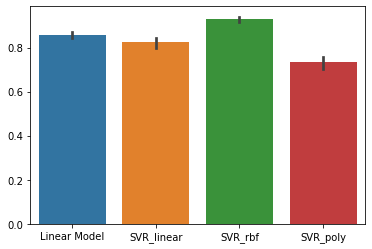

In [431]:
ax = sns.barplot(data=score)

# 5.3 Prediction and Evaluation

In [432]:
svr_lin 
svr_rbf 
svr_poly 

SVR(C=6, degree=2, kernel='poly')

In [433]:
LM_pred = model_LM.fit(X_train, Y_train).predict(X_test)
LM_pred.shape

(362, 1)

In [434]:
SVRLIN_pred = svr_lin.fit(X_train, Y_train).predict(X_test)
SVRLIN_pred.shape

C:\Users\ACER-OAT\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(362,)

In [435]:
SVRRBF_pred = svr_rbf.fit(X_train, Y_train).predict(X_test)
SVRRBF_pred.shape

C:\Users\ACER-OAT\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(362,)

In [436]:
SVRPOLY_pred = svr_poly.fit(X_train, Y_train).predict(X_test)
SVRPOLY_pred.shape

C:\Users\ACER-OAT\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(362,)

In [437]:
plotingx = pd.DataFrame(X_test.iloc[:-1, 2:3].values ,columns=["x_t"])
plotingy = pd.DataFrame(LM_pred ,columns=["y_pre"])
ploting = pd.concat([plotingx, plotingy], axis=1, join='inner')

In [438]:
def _preplot(Y_pred):
    plotingx = pd.DataFrame(X_test.iloc[:-1, 1:2].values ,columns=["x_test"])
    plotingy = pd.DataFrame(Y_pred ,columns=["y_pred"])
    ploting = pd.concat([plotingx, plotingy], axis=1, join='inner')
    return ploting

In [439]:
X_train.iloc[:-1, 1:2].shape
Y_train[:-1]

,"(Adj Close, MSFT)"
0,59.752354
1,59.976398
2,59.995068
3,60.116417
4,60.667187
...,...
837,203.896988
838,205.157364
839,204.852112
840,200.795273


In [440]:
def _plot(preplot_df):
    plt.figure(figsize=(12,15))
    sns.lmplot(x="x_test" , y="y_pred" ,data=preplot_df, order=3, ci=None, scatter_kws={"s": 25}  )
    #sns.jointplot(x="x_test" , y="y_pred" ,data=preplot_df ,kind="reg" )

## LM Plot

<Figure size 864x1080 with 0 Axes>

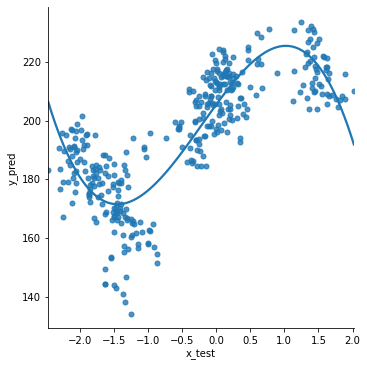

In [441]:
LM_preplot = _preplot(LM_pred)
_plot(LM_preplot)

## SVR_LINEAR

<Figure size 864x1080 with 0 Axes>

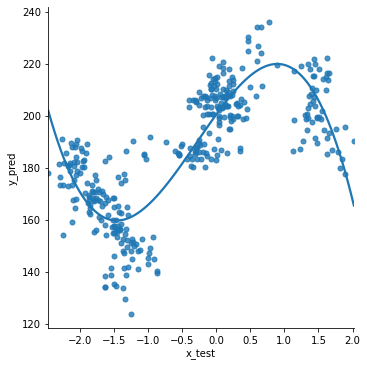

In [442]:
SVRLIN_preplot = _preplot(SVRLIN_pred)
_plot(SVRLIN_preplot)

## SVRRBF_pred

<Figure size 864x1080 with 0 Axes>

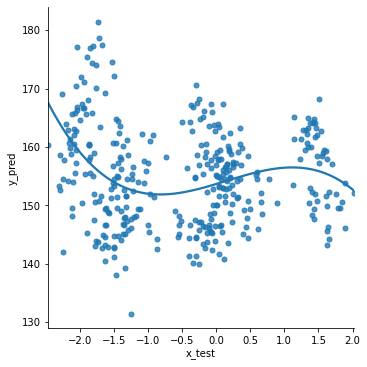

In [443]:
SVRBRF_preplot = _preplot(SVRRBF_pred)
_plot(SVRBRF_preplot)

## SVR_POLY

<Figure size 864x1080 with 0 Axes>

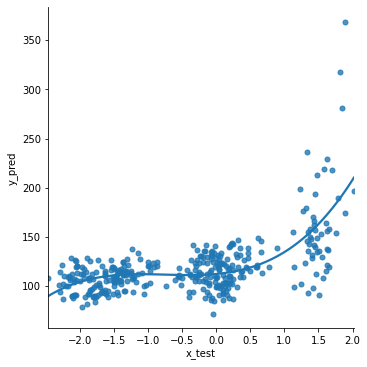

In [444]:
SVRPOLY_preplot = _preplot(SVRPOLY_pred)
_plot(SVRPOLY_preplot)

In [445]:
LM_pred.shape

(362, 1)

In [473]:
def _mse(y_pre):
    mse = metrics.mean_squared_error(Y_test, y_pre)
    return mse
def _r2(y_pre):
    r2 = metrics.r2_score(Y_test, y_pre)
    return r2

In [474]:
ypred_list = [LM_pred,SVRLIN_pred,SVRRBF_pred,SVRPOLY_pred]
MSE_list = []
r2_list = []
for i in ypred_list:
    mse = _mse(i)
    r2 = _r2(i)
    MSE_list.append(mse)
    r2_list.append(r2)

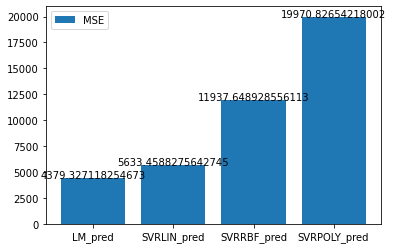

In [475]:
ypos = np.array(["LM_pred","SVRLIN_pred",'SVRRBF_pred','SVRPOLY_pred'])
plt.bar(ypos , MSE_list ,label="MSE" ,align="center"  )
for i in range(len(MSE_list)):
        plt.text(i , MSE_list[i] ,MSE_list[i] ,ha="center")
plt.legend()

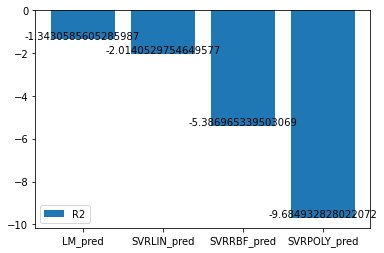

In [477]:
plt.bar(  ypos ,r2_list ,label="R2" ,align="center"  )
for i in range(len(r2_list)):
        plt.text(i , r2_list[i] ,r2_list[i] ,ha="center")
plt.legend()